In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('Dataset/petrol_consumption.csv')
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [40]:
df.shape


(48, 5)

##### Seperate the Variables

In [41]:
x = df.drop('Petrol_Consumption',axis=1)
y = df['Petrol_Consumption']


##### Cross Validation

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

In [44]:
x_train.shape,x_test.shape

((36, 4), (12, 4))

##### build the Model

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
reg_rf = RandomForestRegressor(random_state=0, n_estimators = 20)

In [47]:
%%time
reg_rf.fit(x_train,y_train)

CPU times: total: 31.2 ms
Wall time: 22 ms


RandomForestRegressor(n_estimators=20, random_state=0)

In [48]:
%%time
y_pred = reg_rf.predict(x_test)

CPU times: total: 0 ns
Wall time: 3 ms


In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [52]:
mean_absolute_error(y_test,y_pred)

58.00833333333333

In [53]:
mean_absolute_percentage_error(y_test,y_pred)

0.11049193717501382

In [54]:
np.sqrt(mean_squared_error(y_test,y_pred))

69.17301376500328

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [56]:
reg_rf.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=209652396),
 DecisionTreeRegressor(max_features=1.0, random_state=398764591),
 DecisionTreeRegressor(max_features=1.0, random_state=924231285),
 DecisionTreeRegressor(max_features=1.0, random_state=1478610112),
 DecisionTreeRegressor(max_features=1.0, random_state=441365315),
 DecisionTreeRegressor(max_features=1.0, random_state=1537364731),
 DecisionTreeRegressor(max_features=1.0, random_state=192771779),
 DecisionTreeRegressor(max_features=1.0, random_state=1491434855),
 DecisionTreeRegressor(max_features=1.0, random_state=1819583497),
 DecisionTreeRegressor(max_features=1.0, random_state=530702035),
 DecisionTreeRegressor(max_features=1.0, random_state=626610453),
 DecisionTreeRegressor(max_features=1.0, random_state=1650906866),
 DecisionTreeRegressor(max_features=1.0, random_state=1879422756),
 DecisionTreeRegressor(max_features=1.0, random_state=1277901399),
 DecisionTreeRegressor(max_features=1.0, random_state=1682652230),
 D

In [57]:
from sklearn.tree import plot_tree

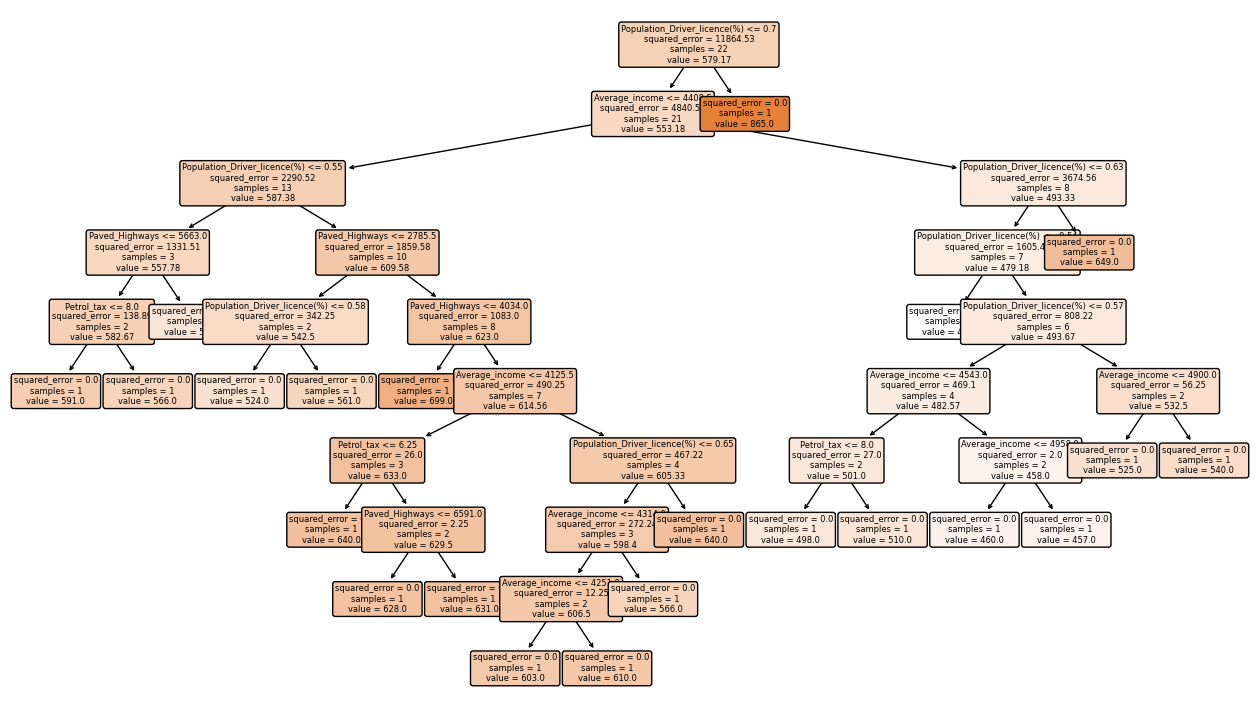

In [58]:
plt.figure(figsize=(16,9))
plot_tree(reg_rf.estimators_[2],fontsize=6,feature_names=x.columns,
         filled=True,precision=2,class_names=('O','F'),
         rounded=True);
plt.savefig('treeclf.png')